In [1]:
import requests
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
import datetime as dt
import pytz

import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

In [2]:
# locked with onecall
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
city = 'paris'
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
current = requests.get(base_url).json()
lat = current['coord']['lat']
lon = current['coord']['lon']

In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
try:
    onecall_data = requests.get(base_url).json()
except:
    exit()

In [4]:
onecall_data

{'lat': 48.8534,
 'lon': 2.3488,
 'timezone': 'Europe/Paris',
 'timezone_offset': 7200,
 'current': {'dt': 1718607472,
  'sunrise': 1718595992,
  'sunset': 1718654201,
  'temp': 16.2,
  'feels_like': 16.2,
  'pressure': 1012,
  'humidity': 89,
  'dew_point': 14.39,
  'uvi': 1.23,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 2.06,
  'wind_deg': 210,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}]},
 'daily': [{'dt': 1718622000,
   'sunrise': 1718595992,
   'sunset': 1718654201,
   'moonrise': 1718637720,
   'moonset': 1718585460,
   'moon_phase': 0.35,
   'temp': {'day': 19.04,
    'min': 13.43,
    'max': 22.02,
    'night': 17.72,
    'eve': 21.41,
    'morn': 14.89},
   'feels_like': {'day': 18.96, 'night': 17.85, 'eve': 21.28, 'morn': 14.84},
   'pressure': 1012,
   'humidity': 75,
   'dew_point': 14.51,
   'wind_speed': 3.27,
   'wind_deg': 215,
   'wind_gust': 9.56,
   'weather': [{'id': 500,
     'main': 'Rain',

In [5]:
def human_date(d):
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S') 

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

In [6]:
df = onecall_data['daily']
current = onecall_data['current']
current

{'dt': 1718607472,
 'sunrise': 1718595992,
 'sunset': 1718654201,
 'temp': 16.2,
 'feels_like': 16.2,
 'pressure': 1012,
 'humidity': 89,
 'dew_point': 14.39,
 'uvi': 1.23,
 'clouds': 100,
 'visibility': 10000,
 'wind_speed': 2.06,
 'wind_deg': 210,
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}]}

In [7]:
human_date(current['dt']),get_date(current['dt']),get_time(current['dt'])

('17/06/2024 08:57:52', '17/06/2024', '08:57:52')

In [8]:
day1 = df[0]
day1

{'dt': 1718622000,
 'sunrise': 1718595992,
 'sunset': 1718654201,
 'moonrise': 1718637720,
 'moonset': 1718585460,
 'moon_phase': 0.35,
 'temp': {'day': 19.04,
  'min': 13.43,
  'max': 22.02,
  'night': 17.72,
  'eve': 21.41,
  'morn': 14.89},
 'feels_like': {'day': 18.96, 'night': 17.85, 'eve': 21.28, 'morn': 14.84},
 'pressure': 1012,
 'humidity': 75,
 'dew_point': 14.51,
 'wind_speed': 3.27,
 'wind_deg': 215,
 'wind_gust': 9.56,
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'clouds': 100,
 'pop': 1,
 'rain': 1.65,
 'uvi': 5.07}

In [9]:
import json
print(json.dumps(day1, indent=4))

{
    "dt": 1718622000,
    "sunrise": 1718595992,
    "sunset": 1718654201,
    "moonrise": 1718637720,
    "moonset": 1718585460,
    "moon_phase": 0.35,
    "temp": {
        "day": 19.04,
        "min": 13.43,
        "max": 22.02,
        "night": 17.72,
        "eve": 21.41,
        "morn": 14.89
    },
    "feels_like": {
        "day": 18.96,
        "night": 17.85,
        "eve": 21.28,
        "morn": 14.84
    },
    "pressure": 1012,
    "humidity": 75,
    "dew_point": 14.51,
    "wind_speed": 3.27,
    "wind_deg": 215,
    "wind_gust": 9.56,
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "clouds": 100,
    "pop": 1,
    "rain": 1.65,
    "uvi": 5.07
}


In [10]:
# Serializing json
json_object = json.dumps(day1, indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [11]:
# get data from list of dicts
_8days = pd.DataFrame.from_records(df)
_8days.loc[0]

dt                                                   1718622000
sunrise                                              1718595992
sunset                                               1718654201
moonrise                                             1718637720
moonset                                              1718585460
moon_phase                                                 0.35
temp          {'day': 19.04, 'min': 13.43, 'max': 22.02, 'ni...
feels_like    {'day': 18.96, 'night': 17.85, 'eve': 21.28, '...
pressure                                                   1012
humidity                                                     75
dew_point                                                 14.51
wind_speed                                                 3.27
wind_deg                                                    215
wind_gust                                                  9.56
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                  

In [12]:
_8days.loc[0].temp.keys()

dict_keys(['day', 'min', 'max', 'night', 'eve', 'morn'])

In [13]:
_8days.loc[0].feels_like.keys()

dict_keys(['day', 'night', 'eve', 'morn'])

In [14]:
# weather is a list of dictionaries
_8days.loc[0].weather[0]

{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}

In [15]:
for key in _8days.loc[0].weather[0].keys():
    _8days[key]=_8days.loc[0].weather[0][key]
for key in _8days.loc[0].temp.keys():
    _8days[key]=_8days.loc[0].temp[key]
for key in _8days.loc[0].feels_like.keys():
    key2 = "fl_"+key
    #print(type(key))
    _8days[key2]=_8days.loc[0].feels_like[key]

In [16]:
_8days.loc[0]

dt                                                    1718622000
sunrise                                               1718595992
sunset                                                1718654201
moonrise                                              1718637720
moonset                                               1718585460
moon_phase                                                  0.35
temp           {'day': 19.04, 'min': 13.43, 'max': 22.02, 'ni...
feels_like     {'day': 18.96, 'night': 17.85, 'eve': 21.28, '...
pressure                                                    1012
humidity                                                      75
dew_point                                                  14.51
wind_speed                                                  3.27
wind_deg                                                     215
wind_gust                                                   9.56
weather        [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                   

In [17]:
_8days = _8days.drop(['temp','feels_like','weather'],axis=1)
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           8 non-null      int64  
 1   sunrise      8 non-null      int64  
 2   sunset       8 non-null      int64  
 3   moonrise     8 non-null      int64  
 4   moonset      8 non-null      int64  
 5   moon_phase   8 non-null      float64
 6   pressure     8 non-null      int64  
 7   humidity     8 non-null      int64  
 8   dew_point    8 non-null      float64
 9   wind_speed   8 non-null      float64
 10  wind_deg     8 non-null      int64  
 11  wind_gust    8 non-null      float64
 12  clouds       8 non-null      int64  
 13  pop          8 non-null      int64  
 14  rain         7 non-null      float64
 15  uvi          8 non-null      float64
 16  id           8 non-null      int64  
 17  main         8 non-null      object 
 18  description  8 non-null      object 
 19  icon        

In [18]:
#__8days[['dt','sunrise','sunset']]= pd.to_datetime(__8days[['dt','sunrise','sunset']], infer_datetime_format=True)
#df['dt'].apply(lambda x: x.date())
#__8days['dt'] = __8days['dt'].apply(lambda x: x.datetime64())

In [19]:
_8days['depression']=_8days['day']-_8days['dew_point']

In [20]:
_8days.keys()

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
       'pressure', 'humidity', 'dew_point', 'wind_speed', 'wind_deg',
       'wind_gust', 'clouds', 'pop', 'rain', 'uvi', 'id', 'main',
       'description', 'icon', 'day', 'min', 'max', 'night', 'eve', 'morn',
       'fl_day', 'fl_night', 'fl_eve', 'fl_morn', 'depression'],
      dtype='object')

In [21]:
_8days.loc[0]

dt             1718622000
sunrise        1718595992
sunset         1718654201
moonrise       1718637720
moonset        1718585460
moon_phase           0.35
pressure             1012
humidity               75
dew_point           14.51
wind_speed           3.27
wind_deg              215
wind_gust            9.56
clouds                100
pop                     1
rain                 1.65
uvi                  5.07
id                    500
main                 Rain
description    light rain
icon                  10d
day                 19.04
min                 13.43
max                 22.02
night               17.72
eve                 21.41
morn                14.89
fl_day              18.96
fl_night            17.85
fl_eve              21.28
fl_morn             14.84
depression           4.53
Name: 0, dtype: object

In [22]:
# columns with dates
_8days.keys()[:5]

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset'], dtype='object')

In [23]:
_8days.loc[0]

dt             1718622000
sunrise        1718595992
sunset         1718654201
moonrise       1718637720
moonset        1718585460
moon_phase           0.35
pressure             1012
humidity               75
dew_point           14.51
wind_speed           3.27
wind_deg              215
wind_gust            9.56
clouds                100
pop                     1
rain                 1.65
uvi                  5.07
id                    500
main                 Rain
description    light rain
icon                  10d
day                 19.04
min                 13.43
max                 22.02
night               17.72
eve                 21.41
morn                14.89
fl_day              18.96
fl_night            17.85
fl_eve              21.28
fl_morn             14.84
depression           4.53
Name: 0, dtype: object

In [24]:
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)

In [25]:
_8days

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,...,min,max,night,eve,morn,fl_day,fl_night,fl_eve,fl_morn,depression
0,17/06/2024,05:46:32,21:56:41,17:22:00,02:51:00,0.35,1012,75,14.51,3.27,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,4.53
1,18/06/2024,05:46:36,21:57:02,18:35:00,03:07:00,0.38,1013,88,16.85,3.68,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,2.19
2,19/06/2024,05:46:42,21:57:20,19:51:00,03:27:00,0.41,1018,93,15.00,3.83,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,4.04
3,20/06/2024,05:46:51,21:57:35,21:06:00,03:54:00,0.44,1015,90,17.25,3.45,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,1.79
4,21/06/2024,05:47:03,21:57:48,22:14:00,04:32:00,0.48,1016,84,11.71,4.75,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,7.33
5,22/06/2024,05:47:17,21:57:58,23:11:00,05:25:00,0.50,1016,50,8.95,4.62,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,10.09
6,23/06/2024,05:47:34,21:58:06,23:54:00,06:32:00,0.55,1017,53,9.69,4.33,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,9.35
7,24/06/2024,05:47:53,21:58:11,01:00:00,07:52:00,0.58,1021,36,7.79,2.24,...,13.43,22.02,17.72,21.41,14.89,18.96,17.85,21.28,14.84,11.25


The format of the JSON string:

‘split’ : dict like {‘index’ -> [index], ‘columns’ -> [columns], ‘data’ -> [values]}

‘records’ : list like [{column -> value}, … , {column -> value}]

‘index’ : dict like {index -> {column -> value}}

‘columns’ : dict like {column -> {index -> value}}

‘values’ : just the values array

‘table’ : dict like {‘schema’: {schema}, ‘data’: {data}}

In [100]:
_8days.to_csv('8days.csv', index=False)

In [107]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html#pandas.DataFrame.to_dict
result = _8days.to_dict('records')
result

[{'dt': Timestamp('2024-06-17 13:00:00'),
  'sunrise': Timestamp('2024-06-17 05:46:32'),
  'sunset': Timestamp('2024-06-17 21:56:41'),
  'moonrise': Timestamp('2024-06-17 17:22:00'),
  'moonset': Timestamp('2024-06-17 02:51:00'),
  'moon_phase': 0.35,
  'temp': {'day': 19.04,
   'min': 13.43,
   'max': 22.02,
   'night': 17.72,
   'eve': 21.41,
   'morn': 14.89},
  'feels_like': {'day': 18.96, 'night': 17.85, 'eve': 21.28, 'morn': 14.84},
  'pressure': 1012,
  'humidity': 75,
  'dew_point': 14.51,
  'wind_speed': 3.27,
  'wind_deg': 215,
  'wind_gust': 9.56,
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'clouds': 100,
  'pop': 1,
  'rain': 1.65,
  'uvi': 5.07},
 {'dt': Timestamp('2024-06-18 13:00:00'),
  'sunrise': Timestamp('2024-06-18 05:46:36'),
  'sunset': Timestamp('2024-06-18 21:57:02'),
  'moonrise': Timestamp('2024-06-18 18:35:00'),
  'moonset': Timestamp('2024-06-18 03:07:00'),
  'moon_phase': 0.38,
  'temp': {'day': 19.0

In [108]:
len(result)

8

In [101]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html#pandas.DataFrame.to_json
result = _8days.to_json(orient="records")
result

'[{"dt":1718629200000,"sunrise":1718603192000,"sunset":1718661401000,"moonrise":1718644920000,"moonset":1718592660000,"moon_phase":0.35,"temp":{"day":19.04,"min":13.43,"max":22.02,"night":17.72,"eve":21.41,"morn":14.89},"feels_like":{"day":18.96,"night":17.85,"eve":21.28,"morn":14.84},"pressure":1012,"humidity":75,"dew_point":14.51,"wind_speed":3.27,"wind_deg":215,"wind_gust":9.56,"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"clouds":100,"pop":1,"rain":1.65,"uvi":5.07},{"dt":1718715600000,"sunrise":1718689596000,"sunset":1718747822000,"moonrise":1718735700000,"moonset":1718680020000,"moon_phase":0.38,"temp":{"day":19.09,"min":15.64,"max":23.48,"night":17.3,"eve":19.97,"morn":16.3},"feels_like":{"day":19.35,"night":17.64,"eve":20.32,"morn":16.44},"pressure":1013,"humidity":88,"dew_point":16.85,"wind_speed":3.68,"wind_deg":16,"wind_gust":7.99,"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"}],"clouds":100,"pop":1,"rain":10.8,"u

In [104]:
type(result)

str

In [97]:
print(result)

{"columns":["dt","sunrise","sunset","moonrise","moonset","moon_phase","temp","feels_like","pressure","humidity","dew_point","wind_speed","wind_deg","wind_gust","weather","clouds","pop","rain","uvi"],"index":[0,1,2,3,4,5,6,7],"data":[[1718629200000,1718603192000,1718661401000,1718644920000,1718592660000,0.35,{"day":19.04,"min":13.43,"max":22.02,"night":17.72,"eve":21.41,"morn":14.89},{"day":18.96,"night":17.85,"eve":21.28,"morn":14.84},1012,75,14.51,3.27,215,9.56,[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],100,1,1.65,5.07],[1718715600000,1718689596000,1718747822000,1718735700000,1718680020000,0.38,{"day":19.09,"min":15.64,"max":23.48,"night":17.3,"eve":19.97,"morn":16.3},{"day":19.35,"night":17.64,"eve":20.32,"morn":16.44},1013,88,16.85,3.68,16,7.99,[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"}],100,1,10.8,5.47],[1718802000000,1718776002000,1718834240000,1718826660000,1718767620000,0.41,{"day":16.32,"min":14.8,"max":22.36,"night":18.4,"eve":

In [94]:
result = _8days.to_json(orient="split")
result

'{"columns":["dt","sunrise","sunset","moonrise","moonset","moon_phase","temp","feels_like","pressure","humidity","dew_point","wind_speed","wind_deg","wind_gust","weather","clouds","pop","rain","uvi"],"index":[0,1,2,3,4,5,6,7],"data":[[1718629200000,1718603192000,1718661401000,1718644920000,1718592660000,0.35,{"day":19.04,"min":13.43,"max":22.02,"night":17.72,"eve":21.41,"morn":14.89},{"day":18.96,"night":17.85,"eve":21.28,"morn":14.84},1012,75,14.51,3.27,215,9.56,[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],100,1,1.65,5.07],[1718715600000,1718689596000,1718747822000,1718735700000,1718680020000,0.38,{"day":19.09,"min":15.64,"max":23.48,"night":17.3,"eve":19.97,"morn":16.3},{"day":19.35,"night":17.64,"eve":20.32,"morn":16.44},1013,88,16.85,3.68,16,7.99,[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"}],100,1,10.8,5.47],[1718802000000,1718776002000,1718834240000,1718826660000,1718767620000,0.41,{"day":16.32,"min":14.8,"max":22.36,"night":18.4,"eve"

In [95]:
len(result)

2770

In [88]:
# save as json file
with open("8days.json", "w") as outfile:
    json.dump(result, outfile)

# Other way to select columns

In [29]:
df

[{'dt': 1718622000,
  'sunrise': 1718595992,
  'sunset': 1718654201,
  'moonrise': 1718637720,
  'moonset': 1718585460,
  'moon_phase': 0.35,
  'temp': {'day': 19.04,
   'min': 13.43,
   'max': 22.02,
   'night': 17.72,
   'eve': 21.41,
   'morn': 14.89},
  'feels_like': {'day': 18.96, 'night': 17.85, 'eve': 21.28, 'morn': 14.84},
  'pressure': 1012,
  'humidity': 75,
  'dew_point': 14.51,
  'wind_speed': 3.27,
  'wind_deg': 215,
  'wind_gust': 9.56,
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'clouds': 100,
  'pop': 1,
  'rain': 1.65,
  'uvi': 5.07},
 {'dt': 1718708400,
  'sunrise': 1718682396,
  'sunset': 1718740622,
  'moonrise': 1718728500,
  'moonset': 1718672820,
  'moon_phase': 0.38,
  'temp': {'day': 19.09,
   'min': 15.64,
   'max': 23.48,
   'night': 17.3,
   'eve': 19.97,
   'morn': 16.3},
  'feels_like': {'day': 19.35, 'night': 17.64, 'eve': 20.32, 'morn': 16.44},
  'pressure': 1013,
  'humidity': 88,
  'dew_point': 

In [30]:
_8days = pd.DataFrame.from_records(df)
_8days.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          8 non-null      int64  
 1   sunrise     8 non-null      int64  
 2   sunset      8 non-null      int64  
 3   moonrise    8 non-null      int64  
 4   moonset     8 non-null      int64  
 5   moon_phase  8 non-null      float64
 6   temp        8 non-null      object 
 7   feels_like  8 non-null      object 
 8   pressure    8 non-null      int64  
 9   humidity    8 non-null      int64  
 10  dew_point   8 non-null      float64
 11  wind_speed  8 non-null      float64
 12  wind_deg    8 non-null      int64  
 13  wind_gust   8 non-null      float64
 14  weather     8 non-null      object 
 15  clouds      8 non-null      int64  
 16  pop         8 non-null      int64  
 17  rain        7 non-null      float64
 18  uvi         8 non-null      float64
dtypes: float64(6), int64(10), object(

In [31]:
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)

In [32]:
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          8 non-null      object 
 1   sunrise     8 non-null      object 
 2   sunset      8 non-null      object 
 3   moonrise    8 non-null      object 
 4   moonset     8 non-null      object 
 5   moon_phase  8 non-null      float64
 6   temp        8 non-null      object 
 7   feels_like  8 non-null      object 
 8   pressure    8 non-null      int64  
 9   humidity    8 non-null      int64  
 10  dew_point   8 non-null      float64
 11  wind_speed  8 non-null      float64
 12  wind_deg    8 non-null      int64  
 13  wind_gust   8 non-null      float64
 14  weather     8 non-null      object 
 15  clouds      8 non-null      int64  
 16  pop         8 non-null      int64  
 17  rain        7 non-null      float64
 18  uvi         8 non-null      float64
dtypes: float64(6), int64(5), object(8

In [33]:
_8days = pd.DataFrame.from_records(df)
# convert int64 to timestamp
_8days['dt'] = _8days['dt'].apply(pd.Timestamp.fromtimestamp)
_8days['sunrise'] = _8days['sunrise'].apply(pd.Timestamp.fromtimestamp)
_8days['sunset'] = _8days['sunset'].apply(pd.Timestamp.fromtimestamp)
_8days['moonrise'] = _8days['moonrise'].apply(pd.Timestamp.fromtimestamp)
_8days['moonset'] = _8days['moonset'].apply(pd.Timestamp.fromtimestamp)
_8days[['dt','sunrise','sunset','moonrise','moonset']]



,dt,sunrise,sunset,moonrise,moonset
0,2024-06-17 13:00:00,2024-06-17 05:46:32,2024-06-17 21:56:41,2024-06-17 17:22:00,2024-06-17 02:51:00
1,2024-06-18 13:00:00,2024-06-18 05:46:36,2024-06-18 21:57:02,2024-06-18 18:35:00,2024-06-18 03:07:00
2,2024-06-19 13:00:00,2024-06-19 05:46:42,2024-06-19 21:57:20,2024-06-19 19:51:00,2024-06-19 03:27:00
3,2024-06-20 13:00:00,2024-06-20 05:46:51,2024-06-20 21:57:35,2024-06-20 21:06:00,2024-06-20 03:54:00
4,2024-06-21 13:00:00,2024-06-21 05:47:03,2024-06-21 21:57:48,2024-06-21 22:14:00,2024-06-21 04:32:00
5,2024-06-22 13:00:00,2024-06-22 05:47:17,2024-06-22 21:57:58,2024-06-22 23:11:00,2024-06-22 05:25:00
6,2024-06-23 13:00:00,2024-06-23 05:47:34,2024-06-23 21:58:06,2024-06-23 23:54:00,2024-06-23 06:32:00
7,2024-06-24 13:00:00,2024-06-24 05:47:53,2024-06-24 21:58:11,1970-01-01 01:00:00,2024-06-24 07:52:00


In [34]:
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:19]
focus
focus_idx =_8days.keys()[focus]
focus_idx
status2 = pd.DataFrame(_8days[focus_idx])
status2

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,pop,rain,uvi
0,2024-06-17 13:00:00,2024-06-17 05:46:32,2024-06-17 21:56:41,2024-06-17 17:22:00,2024-06-17 02:51:00,0.35,1012,75,14.51,3.27,215,9.56,1,1.65,5.07
1,2024-06-18 13:00:00,2024-06-18 05:46:36,2024-06-18 21:57:02,2024-06-18 18:35:00,2024-06-18 03:07:00,0.38,1013,88,16.85,3.68,16,7.99,1,10.80,5.47
2,2024-06-19 13:00:00,2024-06-19 05:46:42,2024-06-19 21:57:20,2024-06-19 19:51:00,2024-06-19 03:27:00,0.41,1018,93,15.00,3.83,33,9.09,1,8.41,7.06
3,2024-06-20 13:00:00,2024-06-20 05:46:51,2024-06-20 21:57:35,2024-06-20 21:06:00,2024-06-20 03:54:00,0.44,1015,90,17.25,3.45,42,9.51,1,8.57,7.56
4,2024-06-21 13:00:00,2024-06-21 05:47:03,2024-06-21 21:57:48,2024-06-21 22:14:00,2024-06-21 04:32:00,0.48,1016,84,11.71,4.75,260,10.15,1,15.11,4.12
5,2024-06-22 13:00:00,2024-06-22 05:47:17,2024-06-22 21:57:58,2024-06-22 23:11:00,2024-06-22 05:25:00,0.50,1016,50,8.95,4.62,232,8.08,1,2.01,5.00
6,2024-06-23 13:00:00,2024-06-23 05:47:34,2024-06-23 21:58:06,2024-06-23 23:54:00,2024-06-23 06:32:00,0.55,1017,53,9.69,4.33,311,10.41,1,0.69,5.00
7,2024-06-24 13:00:00,2024-06-24 05:47:53,2024-06-24 21:58:11,1970-01-01 01:00:00,2024-06-24 07:52:00,0.58,1021,36,7.79,2.24,41,2.52,0,NaN,5.00


In [35]:
_8days[["dt", "sunrise", "sunset"]]

,dt,sunrise,sunset
0,2024-06-17 13:00:00,2024-06-17 05:46:32,2024-06-17 21:56:41
1,2024-06-18 13:00:00,2024-06-18 05:46:36,2024-06-18 21:57:02
2,2024-06-19 13:00:00,2024-06-19 05:46:42,2024-06-19 21:57:20
3,2024-06-20 13:00:00,2024-06-20 05:46:51,2024-06-20 21:57:35
4,2024-06-21 13:00:00,2024-06-21 05:47:03,2024-06-21 21:57:48
5,2024-06-22 13:00:00,2024-06-22 05:47:17,2024-06-22 21:57:58
6,2024-06-23 13:00:00,2024-06-23 05:47:34,2024-06-23 21:58:06
7,2024-06-24 13:00:00,2024-06-24 05:47:53,2024-06-24 21:58:11


In [36]:
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dt          8 non-null      datetime64[ns]
 1   sunrise     8 non-null      datetime64[ns]
 2   sunset      8 non-null      datetime64[ns]
 3   moonrise    8 non-null      datetime64[ns]
 4   moonset     8 non-null      datetime64[ns]
 5   moon_phase  8 non-null      float64       
 6   temp        8 non-null      object        
 7   feels_like  8 non-null      object        
 8   pressure    8 non-null      int64         
 9   humidity    8 non-null      int64         
 10  dew_point   8 non-null      float64       
 11  wind_speed  8 non-null      float64       
 12  wind_deg    8 non-null      int64         
 13  wind_gust   8 non-null      float64       
 14  weather     8 non-null      object        
 15  clouds      8 non-null      int64         
 16  pop         8 non-null      in

In [37]:
_8days.T

,0,1,2,3,4,5,6,7
dt,2024-06-17 13:00:00,2024-06-18 13:00:00,2024-06-19 13:00:00,2024-06-20 13:00:00,2024-06-21 13:00:00,2024-06-22 13:00:00,2024-06-23 13:00:00,2024-06-24 13:00:00
sunrise,2024-06-17 05:46:32,2024-06-18 05:46:36,2024-06-19 05:46:42,2024-06-20 05:46:51,2024-06-21 05:47:03,2024-06-22 05:47:17,2024-06-23 05:47:34,2024-06-24 05:47:53
sunset,2024-06-17 21:56:41,2024-06-18 21:57:02,2024-06-19 21:57:20,2024-06-20 21:57:35,2024-06-21 21:57:48,2024-06-22 21:57:58,2024-06-23 21:58:06,2024-06-24 21:58:11
moonrise,2024-06-17 17:22:00,2024-06-18 18:35:00,2024-06-19 19:51:00,2024-06-20 21:06:00,2024-06-21 22:14:00,2024-06-22 23:11:00,2024-06-23 23:54:00,1970-01-01 01:00:00
moonset,2024-06-17 02:51:00,2024-06-18 03:07:00,2024-06-19 03:27:00,2024-06-20 03:54:00,2024-06-21 04:32:00,2024-06-22 05:25:00,2024-06-23 06:32:00,2024-06-24 07:52:00
moon_phase,0.35,0.38,0.41,0.44,0.48,0.5,0.55,0.58
temp,"{'day': 19.04, 'min': 13.43, 'max': 22.02, 'ni...","{'day': 19.09, 'min': 15.64, 'max': 23.48, 'ni...","{'day': 16.32, 'min': 14.8, 'max': 22.36, 'nig...","{'day': 19.21, 'min': 16.17, 'max': 22.97, 'ni...","{'day': 14.61, 'min': 14.27, 'max': 18.22, 'ni...","{'day': 19.71, 'min': 13.97, 'max': 19.71, 'ni...","{'day': 19.6, 'min': 11.7, 'max': 19.6, 'night...","{'day': 23.34, 'min': 12.56, 'max': 24.52, 'ni..."
feels_like,"{'day': 18.96, 'night': 17.85, 'eve': 21.28, '...","{'day': 19.35, 'night': 17.64, 'eve': 20.32, '...","{'day': 16.44, 'night': 18.62, 'eve': 22.02, '...","{'day': 19.54, 'night': 19.68, 'eve': 22.07, '...","{'day': 14.32, 'night': 14.65, 'eve': 16.36, '...","{'day': 19.04, 'night': 15.3, 'eve': 18.56, 'm...","{'day': 19, 'night': 15.27, 'eve': 18.25, 'mor...","{'day': 22.67, 'night': 18.6, 'eve': 21.99, 'm..."
pressure,1012,1013,1018,1015,1016,1016,1017,1021
humidity,75,88,93,90,84,50,53,36


In [38]:
# Create DataFrame
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
df = DataFrame.from_dict(
      {'Courses':["Spark","Hadoop","pandas"],
     'Fee' :[20000,25000,30000],
     'Duration':['30days','40days','35days'],
     'Discount':[1000,2500,1500],
     'Inserted': ["10/02/2021, 10:39:24","09/12/2021, 08:09:24","01/22/2021, 10:29:14"],
     'Updated':  ["11/12/2021, 11:39:24","10/22/2021, 10:39:34","05/12/2021, 04:49:04"]},
    orient='index', 
    columns=['A', 'B', 'C']).T
df
df.info()
# Use DataFrame.apply() to convert multiple columns to datetime
df[['Inserted','Updated']] = df[['Inserted','Updated']].apply(pd.to_datetime)
print(" After converting multiple columns to datetime:\n", df)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Courses   3 non-null      object
 1   Fee       3 non-null      object
 2   Duration  3 non-null      object
 3   Discount  3 non-null      object
 4   Inserted  3 non-null      object
 5   Updated   3 non-null      object
dtypes: object(6)
memory usage: 168.0+ bytes
 After converting multiple columns to datetime:
   Courses    Fee Duration Discount            Inserted             Updated
A   Spark  20000   30days     1000 2021-10-02 10:39:24 2021-11-12 11:39:24
B  Hadoop  25000   40days     2500 2021-09-12 08:09:24 2021-10-22 10:39:34
C  pandas  30000   35days     1500 2021-01-22 10:29:14 2021-05-12 04:49:04


In [39]:
'''
for k in status2.keys()[:5]:
    #print(k)
    if k=='dt':
        status2[k] = status2[k].apply(get_date)
    else:
        status2[k] = status2[k].apply(get_time)
'''

"\nfor k in status2.keys()[:5]:\n    #print(k)\n    if k=='dt':\n        status2[k] = status2[k].apply(get_date)\n    else:\n        status2[k] = status2[k].apply(get_time)\n"

In [40]:
week = status2.T
# pop = Probability of precipitation
# rain in mm
# uvi W/m²
week

,0,1,2,3,4,5,6,7
dt,2024-06-17 13:00:00,2024-06-18 13:00:00,2024-06-19 13:00:00,2024-06-20 13:00:00,2024-06-21 13:00:00,2024-06-22 13:00:00,2024-06-23 13:00:00,2024-06-24 13:00:00
sunrise,2024-06-17 05:46:32,2024-06-18 05:46:36,2024-06-19 05:46:42,2024-06-20 05:46:51,2024-06-21 05:47:03,2024-06-22 05:47:17,2024-06-23 05:47:34,2024-06-24 05:47:53
sunset,2024-06-17 21:56:41,2024-06-18 21:57:02,2024-06-19 21:57:20,2024-06-20 21:57:35,2024-06-21 21:57:48,2024-06-22 21:57:58,2024-06-23 21:58:06,2024-06-24 21:58:11
moonrise,2024-06-17 17:22:00,2024-06-18 18:35:00,2024-06-19 19:51:00,2024-06-20 21:06:00,2024-06-21 22:14:00,2024-06-22 23:11:00,2024-06-23 23:54:00,1970-01-01 01:00:00
moonset,2024-06-17 02:51:00,2024-06-18 03:07:00,2024-06-19 03:27:00,2024-06-20 03:54:00,2024-06-21 04:32:00,2024-06-22 05:25:00,2024-06-23 06:32:00,2024-06-24 07:52:00
moon_phase,0.35,0.38,0.41,0.44,0.48,0.5,0.55,0.58
pressure,1012,1013,1018,1015,1016,1016,1017,1021
humidity,75,88,93,90,84,50,53,36
dew_point,14.51,16.85,15.0,17.25,11.71,8.95,9.69,7.79
wind_speed,3.27,3.68,3.83,3.45,4.75,4.62,4.33,2.24


In [41]:
#week.loc['dt'].dt.strftime('%Y-%m-%d')

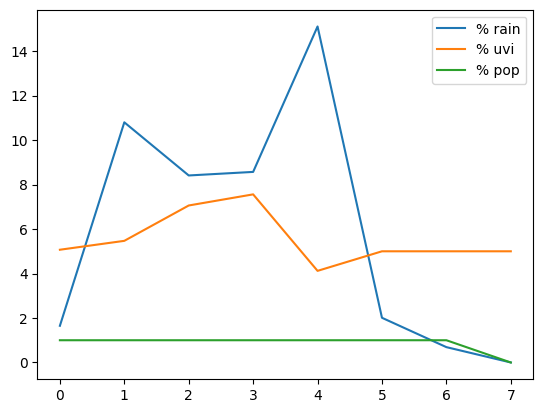

In [42]:
# pd.set_option('future.no_silent_downcasting', True)
week.fillna(0)
week.loc['rain'].fillna(0).plot(label='% rain')
week.loc['uvi'].fillna(0).plot(label='% uvi')
week.loc['pop'].fillna(0).plot(label='% pop')  # pop = Probability of precipitation
plt.legend()

In [43]:
week.to_csv('week.csv')

In [44]:
status2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dt          8 non-null      datetime64[ns]
 1   sunrise     8 non-null      datetime64[ns]
 2   sunset      8 non-null      datetime64[ns]
 3   moonrise    8 non-null      datetime64[ns]
 4   moonset     8 non-null      datetime64[ns]
 5   moon_phase  8 non-null      float64       
 6   pressure    8 non-null      int64         
 7   humidity    8 non-null      int64         
 8   dew_point   8 non-null      float64       
 9   wind_speed  8 non-null      float64       
 10  wind_deg    8 non-null      int64         
 11  wind_gust   8 non-null      float64       
 12  pop         8 non-null      int64         
 13  rain        7 non-null      float64       
 14  uvi         8 non-null      float64       
dtypes: datetime64[ns](5), float64(6), int64(4)
memory usage: 1.1 KB


In [45]:
status2.loc[0]

dt            2024-06-17 13:00:00
sunrise       2024-06-17 05:46:32
sunset        2024-06-17 21:56:41
moonrise      2024-06-17 17:22:00
moonset       2024-06-17 02:51:00
moon_phase                   0.35
pressure                     1012
humidity                       75
dew_point                   14.51
wind_speed                   3.27
wind_deg                      215
wind_gust                    9.56
pop                             1
rain                         1.65
uvi                          5.07
Name: 0, dtype: object

In [46]:
demain = status2.loc[1]  # demain
demain

dt            2024-06-18 13:00:00
sunrise       2024-06-18 05:46:36
sunset        2024-06-18 21:57:02
moonrise      2024-06-18 18:35:00
moonset       2024-06-18 03:07:00
moon_phase                   0.38
pressure                     1013
humidity                       88
dew_point                   16.85
wind_speed                   3.68
wind_deg                       16
wind_gust                    7.99
pop                             1
rain                         10.8
uvi                          5.47
Name: 1, dtype: object

In [47]:
# zip
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv') 

# Formule de Heinrich Gustav Magnus-Tetens
### https://fr.wikipedia.org/wiki/Point_de_ros%C3%A9e


In [48]:

'''Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre
'''
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    dewpoint = b*f/(a-f)
    depression = T-dewpoint
    return dewpoint,depression #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


In [49]:
current, human_date(current['dt'])

({'dt': 1718607472,
  'sunrise': 1718595992,
  'sunset': 1718654201,
  'temp': 16.2,
  'feels_like': 16.2,
  'pressure': 1012,
  'humidity': 89,
  'dew_point': 14.39,
  'uvi': 1.23,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 2.06,
  'wind_deg': 210,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}]},
 '17/06/2024 08:57:52')

In [50]:
T = current['temp']
phi = current['humidity']/100
dewpoint(T, phi), current['dew_point']

((14.3830756737072, 1.8169243262927992), 14.39)

T: 16.2, Hum: 0.89
Dewpoint: 14.3830756737072
Depression:  1.82


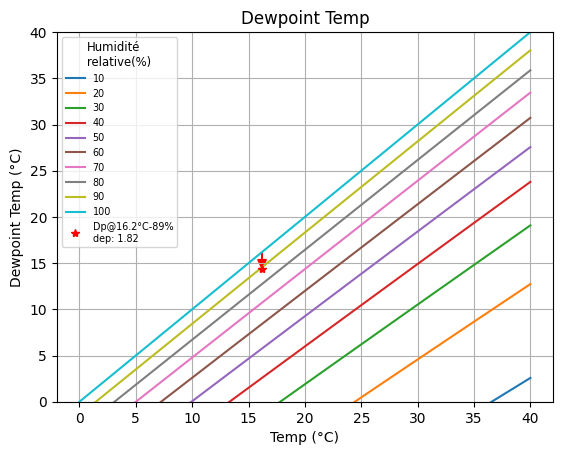

In [51]:
# dewpoint
x = np.linspace(0,40,10)
for hum in np.linspace(0.1,1.,10):
    y = dewpoint(x,hum)[0]
    #x,y
    plt.plot(x,y,label=f'{hum*100:.0f}')
    #plt.legend(fontsize='small',title_fontsize='small')
plt.grid()


hum = current['humidity']/100
T = current['temp']
dp = dewpoint(T,hum)[0]  # dewpoint at current T,hum 
depression = dewpoint(T,hum)[1]  # dew depression at current T,hum
saturation = dewpoint(T,1)[0]  # dewpoint @ T for humidity=100% = T
# show '*' for dewpoint present temp,hum
plt.plot(T,dewpoint(T,hum)[0],'r*',label=f'Dp@{T}°C-{int(hum*100)}%\ndep:{depression:5.2f}')
# show arrow for dewpoint depression = T-Tr at current temp,hum
# arrow (x,y,dx,dy)
plt.arrow(T,T,0,-T+dp,shape='full',head_width = 0.75,head_starts_at_zero=False, length_includes_head=True,fc='red',ec='red',head_length=1)
plt.legend(title='Humidité\nrelative(%)',loc=2,fontsize='x-small',title_fontsize='small')
plt.title('Dewpoint Temp')
plt.xlabel('Temp (°C)')
plt.ylabel('Dewpoint Temp (°C)')
plt.ylim(0,40)

print(f'T: {T}, Hum: {hum}\nDewpoint: {dp}\nDepression: {depression:5.2f}')

In [52]:
hum,saturation,T

(0.89, 16.2, 16.2)

(16.2, 0.89, 16.2, 14.38, 1.82, 'pluie')

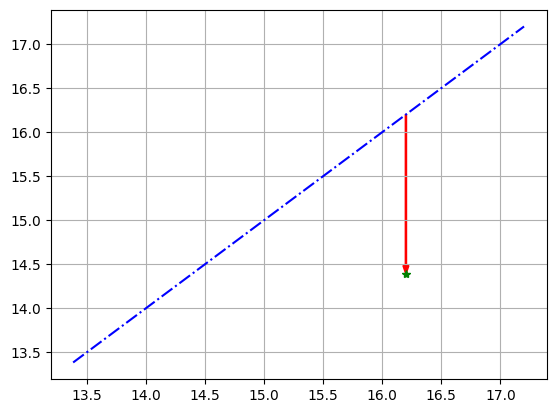

In [53]:
plt.plot(T,dp,'*',c='green')
plt.plot((dp-1,saturation+1),(dp-1,saturation+1),'b-.')
plt.grid()
plt.arrow(T,T,0,-(T-dp),shape='full',width=0.01,head_width = 0.05,head_starts_at_zero=False, length_includes_head=True,fc='red',ec='red',head_length=0.1)

# saturation : humidity=100%
depression= T-dp
T,hum,saturation,round(dp,2),round(depression,2),'pluie' if T-dp<5 else 'beau temps'  #saturation = T

# Dew depression : T - Tr
Plus cette valeur est petite, plus l’humidité relative à cette altitude est grande et plus la présence de nuages est probable. 

Ainsi, une dépression de plus de 5 °C est en général associée avec l'absence de couche nuageuse et une valeur près de 0 °C est synonyme d'une couverture complète. 

(0.0, 40.0)

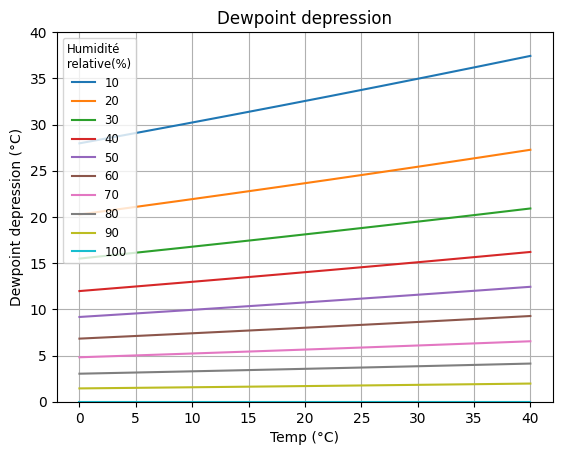

In [54]:
# dewpoint
x = np.linspace(0,40,10)
for hum in np.linspace(0.1,1.,10):
    y = dewpoint(x,hum)[1]
    #x,y
    plt.plot(x,y,label=f'{hum*100:.0f}')
    plt.legend(title='Humidité\nrelative(%)',loc=2,fontsize='small',title_fontsize='small')
plt.grid()
plt.title('Dewpoint depression')
plt.xlabel('Temp (°C)')
plt.ylabel('Dewpoint depression (°C)')
plt.ylim(0,40)

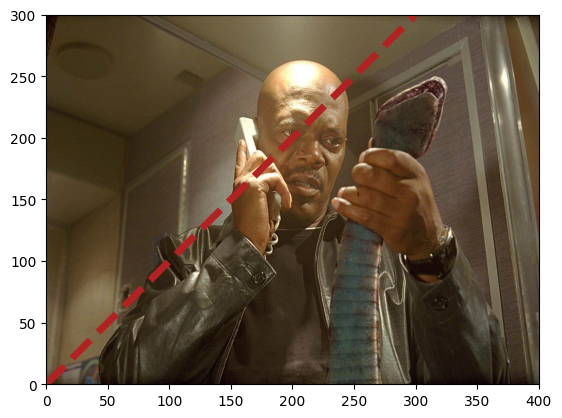

In [55]:

img = plt.imread("snakes-plane.jpg")    # don't work with svg files
fig, ax = plt.subplots()
x = range(300)
ax.imshow(img, extent=[0, 400, 0, 300])
ax.plot(x, x, '--', linewidth=5, color='firebrick')

![Dewpoint](Dewpoint-RH-fr.svg)

![Diagramme binaire Liquide Vapeur](Diagramme_binaire_liquide-vapeur.svg)

Le <b>gradient thermique adiabatique</b> est, dans l'atmosphère terrestre, la variation de température de l'air avec l'altitude, autrement dit le gradient de la température de l'air, qui ne dépend que de la pression atmosphérique, c'est-à-dire :

- sans considération d'échange de chaleur avec l'environnement (autres masses d'air, relief) ;<br>
- sans considération de condensation (formation de nuages) ni de précipitations.
![Rain_shadow_effect](Rain_Shadow_Effect_caused_by_Orographic_Lift.png)

Supposons un vent sec parallèle au sol qui rencontre un obstacle du relief (colline, montagne). L'air suit le relief et s'élève, il subit donc une détente qui le refroidit. Puis, lorsque l'air redescend sur l'autre versant, il se réchauffe. Si l'opération a été suffisamment rapide, l'air n'a pas échangé de chaleur avec l'obstacle ni avec l'air d'altitude, il se retrouve donc à la même température de l'autre côté.

Maintenant, si l'humidité de l'air est assez importante, l'eau va se condenser en montant. Deux scénarios peuvent se produire :

1. s'il ne pleut pas sur le côté face au vent, en redescendant, l'air se réchauffe et donc les gouttelettes d'eau s'évaporent à nouveau. La chaleur libérée par la liquéfaction en montant est réabsorbée par l'évaporation en descendant, l'air a donc également la même température de l'autre côté du versant ;<br><br>
2. s'il pleut au sommet de la montagne, cela change les conditions, l'air a perdu une partie de son humidité au sommet de la montagne. Il y a donc moins d'eau qui s'évapore et ainsi moins de chaleur absorbée : à altitude égale, l'air de l'autre côté du versant est donc plus chaud.

In [56]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO


html = requests.get("https://fr.wikipedia.org/wiki/Gradient_thermique_adiabatique").text.replace(',','.').replace('−','-').replace('- ','-')
html=StringIO(html)

In [57]:
cols= ["altitude(km)",	
"pression(hPa)",
"température(K)",	
"température(°C)",	
"dp(hPa)",	
"dp/p(sans unité)",	
"dT/T(sans unité)",	
"dT(K)"]

In [58]:
data = pd.read_html(html)
len(data), data


(4,
 [    altitude  (km)  pression  (hPa)  température  (K)  température (°C)  \
  0              0.0             1013            288.15             15.00   
  1              0.5              955            283.44             10.29   
  2              1.0              900            278.77              5.62   
  3              1.5              845            273.90              0.75   
  4              2.0              794            269.18             -3.97   
  5              2.5              746            264.53             -8.62   
  6              3.0              700            259.87            -13.28   
  7              3.5              658            255.42            -17.73   
  8              4.0              617            250.87            -22.80   
  9              5.0              541            242.04            -33.11   
  10             6.0              471            233.09            -42.06   
  11             7.0              411            224.61            -50.5

In [59]:
data[0]['température (°C)']

0     15.00
1     10.29
2      5.62
3      0.75
4     -3.97
5     -8.62
6    -13.28
7    -17.73
8    -22.80
9    -33.11
10   -42.06
11   -50.54
12   -56.97
13   -63.47
14   -75.53
15   -83.71
16   -91.66
Name: température (°C), dtype: float64

In [60]:
data[0].columns

Index(['altitude  (km)', 'pression  (hPa)', 'température  (K)',
       'température (°C)', '(hPa)', '(sans unité)', '(sans unité).1', '(K)'],
      dtype='object')

In [61]:
data[0].columns=cols
#data[0].set_axis(cols, axis="columns", inplace=True) 

In [62]:
model1 = data[0]
model1

,altitude(km),pression(hPa),température(K),température(°C),dp(hPa),dp/p(sans unité),dT/T(sans unité),dT(K)
0,0.0,1013,288.15,15.00,NaN,NaN,NaN,NaN
1,0.5,955,283.44,10.29,-58.0,-0.057,-0.016,-4.71
2,1.0,900,278.77,5.62,-55.0,-0.058,-0.016,-4.66
3,1.5,845,273.90,0.75,-55.0,-0.061,-0.017,-4.87
4,2.0,794,269.18,-3.97,-51.0,-0.060,-0.017,-4.72
5,2.5,746,264.53,-8.62,-48.0,-0.060,-0.017,-4.65
6,3.0,700,259.87,-13.28,-46.0,-0.062,-0.018,-4.66
7,3.5,658,255.42,-17.73,-42.0,-0.060,-0.017,-4.45
8,4.0,617,250.87,-22.80,-41.0,-0.062,-0.018,-4.55
9,5.0,541,242.04,-33.11,-76.0,-0.123,-0.035,-8.83


In [63]:
cols= ["altitude(km)",	
"pression(hPa)",
"température(K)",		
"dp(hPa)",	
"dp/p(sans unité)",	
"dT/T(sans unité)",	
"dT(K)"]

In [64]:
model2 = data[1]
model2.columns=cols
model2

,altitude(km),pression(hPa),température(K),dp(hPa),dp/p(sans unité),dT/T(sans unité),dT(K)
0,0.0,1013,288.15,NaN,NaN,NaN,NaN
1,0.5,955,282.15,-58.0,-0.057,-0.016,-4.71
2,1.0,900,280.15,-55.0,-0.058,-0.016,-4.64
3,1.5,845,278.15,-55.0,-0.061,-0.017,-4.89
4,2.0,794,275.15,-51.0,-0.060,-0.017,-4.80
5,2.5,746,272.15,-48.0,-0.060,-0.017,-4.75
6,3.0,700,270.15,-46.0,-0.062,-0.018,-4.79
7,3.5,658,267.15,-42.0,-0.060,-0.017,-4.63
8,4.0,617,263.15,-41.0,-0.062,-0.018,-4.76
9,5.0,541,257.15,-76.0,-0.123,-0.035,-9.26


In [65]:
data

[    altitude(km)  pression(hPa)  température(K)  température(°C)  dp(hPa)  \
 0            0.0           1013          288.15            15.00      NaN   
 1            0.5            955          283.44            10.29    -58.0   
 2            1.0            900          278.77             5.62    -55.0   
 3            1.5            845          273.90             0.75    -55.0   
 4            2.0            794          269.18            -3.97    -51.0   
 5            2.5            746          264.53            -8.62    -48.0   
 6            3.0            700          259.87           -13.28    -46.0   
 7            3.5            658          255.42           -17.73    -42.0   
 8            4.0            617          250.87           -22.80    -41.0   
 9            5.0            541          242.04           -33.11    -76.0   
 10           6.0            471          233.09           -42.06    -70.0   
 11           7.0            411          224.61           -50.5

In [66]:
#model1 = data[0]
#model2 = data[1]
gradient = data[2]
gradient


Altitude (km) Gradient thermique adiabatique (°C/km)           \
   Altitude (km)                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
   Gradient thermique du modèle OACI (°C/km)         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [67]:
level0 = gradient.columns.levels[0]
level1 = gradient.columns.levels[1]
level0, level1
# level1.columns (6 columns) is equivalent to : {0:level1[0], 1:level1[2], 2:level1[3], 3:level1[1], 4:level1[2], 5:level1[3]}

(Index(['Altitude (km)', 'Gradient thermique adiabatique (°C/km)',
        'Gradient thermique du modèle OACI (°C/km)', 'Température (°C)'],
       dtype='object'),
 Index(['Altitude (km)', 'Gradient thermique du modèle OACI (°C/km)',
        'modèle 1', 'modèle 2'],
       dtype='object'))

In [68]:
cols=[".","..","modèle 1","modèle 2"]

In [69]:
#rename level 1 (inplace=True) deprecated with set_levels()
gradient.columns = gradient.columns.set_levels(cols,level=1)

In [70]:
gradient

Altitude (km) Gradient thermique adiabatique (°C/km)           \
               .                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
                                          ..         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [71]:
keys=model1.keys()
keys

Index(['altitude(km)', 'pression(hPa)', 'température(K)', 'température(°C)',
       'dp(hPa)', 'dp/p(sans unité)', 'dT/T(sans unité)', 'dT(K)'],
      dtype='object')

In [72]:
altitude = model1[keys[0]]
pression = model1[keys[1]]
temperatureK = model1[keys[2]]
temperatureC = model1[keys[3]]


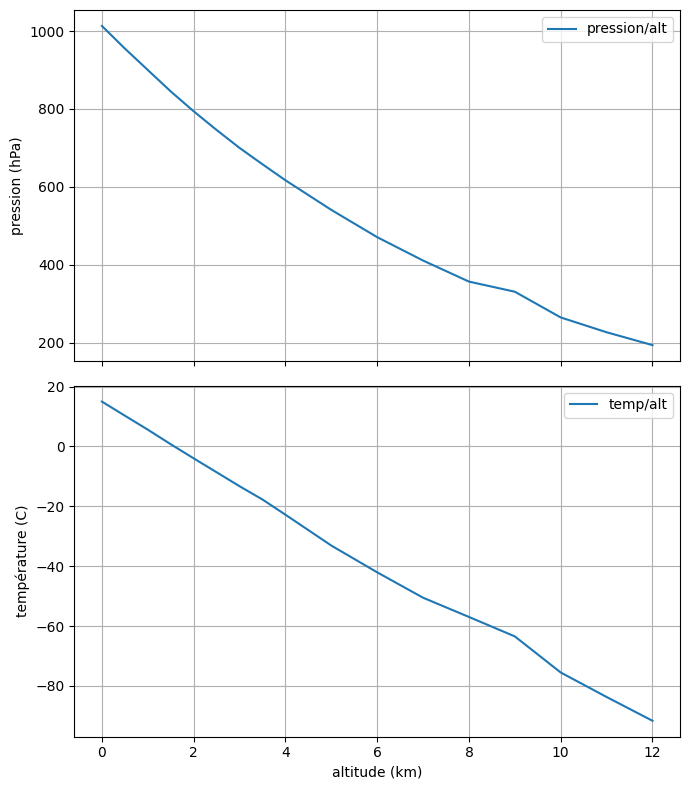

In [73]:
fig, (ax1,ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(7, 8)
ax1.plot(altitude, pression, label='pression/alt')
plt.xlabel('altitude (km)')
ax1.set_ylabel('pression (hPa)')
ax1.legend()
ax1.grid()
ax2.plot(altitude, temperatureC, label='temp/alt')
#ax2.xlabel('altitude (km)')
ax2.set_ylabel('température (C)')
ax2.legend()
ax2.grid()
fig.tight_layout()

In [74]:
gradient

Altitude (km) Gradient thermique adiabatique (°C/km)           \
               .                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
                                          ..         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [75]:
gradient.keys()

MultiIndex([(                            'Altitude (km)',        '.'),
            (   'Gradient thermique adiabatique (°C/km)', 'modèle 1'),
            (   'Gradient thermique adiabatique (°C/km)', 'modèle 2'),
            ('Gradient thermique du modèle OACI (°C/km)',       '..'),
            (                         'Température (°C)', 'modèle 1'),
            (                         'Température (°C)', 'modèle 2')],
           )

In [76]:
g_keys = gradient.keys()
g_alt = gradient[g_keys[0]]
g_model1 = gradient[g_keys[1]]
g_model2 = gradient[g_keys[2]]
#g_model1,g_model2

#gradient.info()

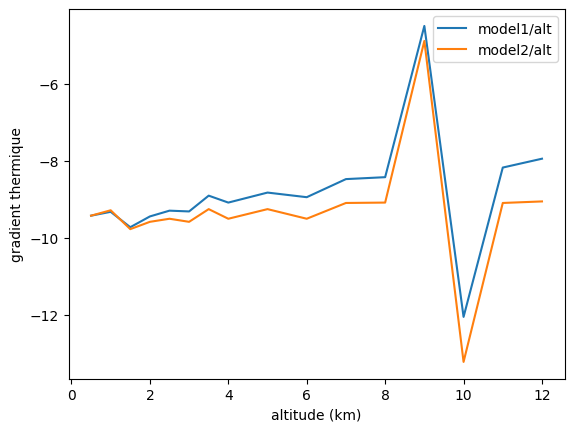

In [77]:
plt.plot(g_alt, g_model1, label='model1/alt')
plt.plot(g_alt, g_model2, label='model2/alt')
plt.xlabel('altitude (km)')
plt.ylabel('gradient thermique')
plt.legend()

In [78]:
#API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
API_Key = 'c9d926a9549ae7933324ef26e13bb200'
#API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
city = 'paris'
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
current = requests.get(base_url).json()
current

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 289.33,
  'feels_like': 289.35,
  'temp_min': 288.15,
  'temp_max': 289.58,
  'pressure': 1012,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 210},
 'clouds': {'all': 100},
 'dt': 1718607362,
 'sys': {'type': 2,
  'id': 2012208,
  'country': 'FR',
  'sunrise': 1718595992,
  'sunset': 1718654201},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [79]:
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
forecast = requests.get(base_url).json()
# 40 items (every 3 hours for 5 days)
forecast['list'][0:2]

[{'dt': 1718614800,
  'main': {'temp': 16.44,
   'feels_like': 16.41,
   'temp_min': 16.44,
   'temp_max': 16.93,
   'pressure': 1012,
   'sea_level': 1012,
   'grnd_level': 1002,
   'humidity': 87,
   'temp_kf': -0.49},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'clouds': {'all': 100},
  'wind': {'speed': 1.13, 'deg': 224, 'gust': 2.43},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2024-06-17 09:00:00'},
 {'dt': 1718625600,
  'main': {'temp': 18.99,
   'feels_like': 18.9,
   'temp_min': 18.99,
   'temp_max': 20.38,
   'pressure': 1012,
   'sea_level': 1012,
   'grnd_level': 1003,
   'humidity': 75,
   'temp_kf': -1.39},
  'weather': [{'id': 500,
    'main': 'Rain',
    'description': 'light rain',
    'icon': '10d'}],
  'clouds': {'all': 100},
  'wind': {'speed': 1.96, 'deg': 197, 'gust': 2.98},
  'visibility': 10000,
  'pop': 0.47,
  'rain': {'3h': 0.58},
  'sys': {'pod': 'd'},
  'dt_txt': '20

In [80]:
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'  # this works for onecall!!
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
onecall_data = requests.get(base_url).json()
onecall_data

{'lat': 48.8534,
 'lon': 2.3488,
 'timezone': 'Europe/Paris',
 'timezone_offset': 7200,
 'current': {'dt': 1718607492,
  'sunrise': 1718595992,
  'sunset': 1718654201,
  'temp': 16.2,
  'feels_like': 16.2,
  'pressure': 1012,
  'humidity': 89,
  'dew_point': 14.39,
  'uvi': 1.23,
  'clouds': 100,
  'visibility': 10000,
  'wind_speed': 2.06,
  'wind_deg': 210,
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}]},
 'daily': [{'dt': 1718622000,
   'sunrise': 1718595992,
   'sunset': 1718654201,
   'moonrise': 1718637720,
   'moonset': 1718585460,
   'moon_phase': 0.35,
   'temp': {'day': 19.04,
    'min': 13.43,
    'max': 22.02,
    'night': 17.72,
    'eve': 21.41,
    'morn': 14.89},
   'feels_like': {'day': 18.96, 'night': 17.85, 'eve': 21.28, 'morn': 14.84},
   'pressure': 1012,
   'humidity': 75,
   'dew_point': 14.51,
   'wind_speed': 3.27,
   'wind_deg': 215,
   'wind_gust': 9.56,
   'weather': [{'id': 500,
     'main': 'Rain',